In [46]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

In [47]:
train = pd.read_csv('mnist_train.csv')

In [48]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
train = np.array(train)
m, n = train.shape
np.random.shuffle(train) # shuffle the set


data_train = train.T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

In [50]:
Y_train

array([3, 6, 1, ..., 4, 0, 3])

In [51]:
def init_values():
    W1 = np.random.rand(10, 784) - 0.5 #28 * 28 Mnist dataset
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5 
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def activation(Z): #ReLu function
    return np.maximum(Z, 0)

def softmax_f(value):
    result = np.exp(value) / sum(np.exp(value))
    return result
    
def forward_p(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = activation(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax_f(Z2)
    return Z1, A1, Z2, A2

def activation_helper(value):
    return value > 0

def backward_helper(arg):
    result = np.zeros((arg.size, arg.max() + 1))
    result[np.arange(arg.size), arg] = 1
    result = result.T
    return result

def backward_p(Z1, A1, Z2, A2, W1, W2, X, Y):
    x = backward_helper(Y)
    dZ2 = A2 - x
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * activation_helper(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_values(W1, b1, W2, b2, dW1, db1, dW2, db2, A):
    W1 = W1 - A * dW1
    b1 = b1 - A * db1    
    W2 = W2 - A * dW2  
    b2 = b2 - A * db2    
    return W1, b1, W2, b2


In [52]:
def find_predictions(value):
    return np.argmax(value, 0)

def calculate_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, A, iterations):
    W1, b1, W2, b2 = init_values()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_p(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_p(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_values(W1, b1, W2, b2, dW1, db1, dW2, db2, A)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = find_predictions(A2)
            print(calculate_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [53]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.20, 1000)

Iteration:  0
[8 9 8 ... 9 8 8] [3 6 1 ... 4 0 3]
0.09865
Iteration:  10
[3 3 1 ... 4 0 3] [3 6 1 ... 4 0 3]
0.2971
Iteration:  20
[3 3 1 ... 4 0 3] [3 6 1 ... 4 0 3]
0.4161166666666667
Iteration:  30
[3 1 1 ... 4 0 3] [3 6 1 ... 4 0 3]
0.5294333333333333
Iteration:  40
[3 1 1 ... 4 0 3] [3 6 1 ... 4 0 3]
0.6029333333333333
Iteration:  50
[3 1 1 ... 4 0 3] [3 6 1 ... 4 0 3]
0.6511833333333333
Iteration:  60
[3 1 1 ... 4 0 3] [3 6 1 ... 4 0 3]
0.6860333333333334
Iteration:  70
[3 1 1 ... 4 0 3] [3 6 1 ... 4 0 3]
0.7135166666666667
Iteration:  80
[3 6 1 ... 4 0 3] [3 6 1 ... 4 0 3]
0.7356833333333334
Iteration:  90
[3 6 1 ... 4 0 3] [3 6 1 ... 4 0 3]
0.7530666666666667
Iteration:  100
[3 6 1 ... 4 0 3] [3 6 1 ... 4 0 3]
0.7663833333333333
Iteration:  110
[3 3 1 ... 4 0 3] [3 6 1 ... 4 0 3]
0.7778333333333334
Iteration:  120
[3 3 1 ... 4 0 3] [3 6 1 ... 4 0 3]
0.7883666666666667
Iteration:  130
[3 3 1 ... 4 0 3] [3 6 1 ... 4 0 3]
0.7976666666666666
Iteration:  140
[3 6 1 ... 4 0 3] [3 6 1

In [54]:
test = pd.read_csv('mnist_test.csv')

In [55]:
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
test = np.array(test)
np.random.shuffle(test) # shuffle the set


data_test = test.T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255

In [58]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    result = find_predictions(A2)
    return result

def model_testing(index, W1, b1, W2, b2):
    image = X_test[:, index, None]
    prediction = make_predictions(X_test[:, index, None], W1, b1, W2, b2)
    label = Y_test[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    image = image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


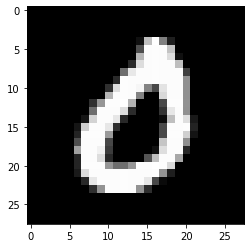

Prediction:  [4]
Label:  4


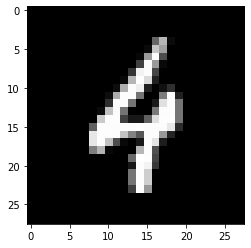

Prediction:  [4]
Label:  4


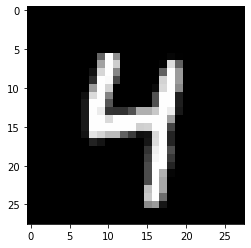

Prediction:  [7]
Label:  7


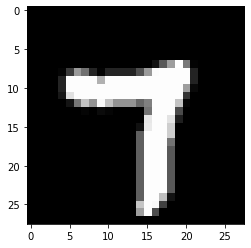

Prediction:  [1]
Label:  1


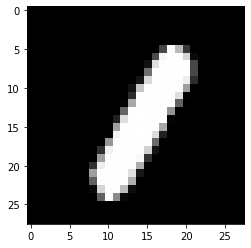

Prediction:  [0]
Label:  0


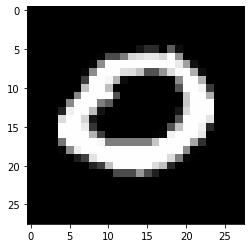

In [59]:
model_testing(7, W1, b1, W2, b2)
model_testing(12, W1, b1, W2, b2)
model_testing(2, W1, b1, W2, b2)
model_testing(23, W1, b1, W2, b2)
model_testing(56, W1, b1, W2, b2)
model_testing(100, W1, b1, W2, b2)